In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv

import random
import PIL
import pickle

In [2]:
! pip install kaggle

                                              0.0/82.1 kB ? eta -:--:--
     ---------------------------------------  81.9/82.1 kB 2.3 MB/s eta 0:00:01
     ---------------------------------------- 82.1/82.1 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/164.4 kB ? eta -:--:--
     -------------------------------------- 164.4/164.4 kB 5.0 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105134 sha256=30c23ab69cbaf71675922733fe7c583dea87522797d6214188399923e4b862db
  Stored in directory: c:\users\chait\appdata\local\pip\cache\wheels\ec\d9\04\93be57edf3835182a8e76d8ff87f7e77a0113f473ba3721ee0
Successfully built kaggle
  Attempting uninstall: certifi
    Found existing installation: certifi 2023.5.7
    Uninstalling certifi-2023.5.7:
      Successfully uninstalled certifi-2023.5.7


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 2.1.1 requires sentencepiece, which is not installed.
spyder 5.4.3 requires jedi<0.19.0,>=0.17.2, but you have jedi 0.19.1 which is incompatible.


In [5]:
!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images

Dataset URL: https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images
License(s): other




  0%|          | 0.00/105M [00:00<?, ?B/s]
  1%|          | 1.00M/105M [00:01<02:35, 698kB/s]
  2%|▏         | 2.00M/105M [00:01<01:17, 1.39MB/s]
  3%|▎         | 3.00M/105M [00:01<00:47, 2.24MB/s]
  5%|▍         | 5.00M/105M [00:02<00:24, 4.18MB/s]
  7%|▋         | 7.00M/105M [00:02<00:15, 6.42MB/s]
  9%|▊         | 9.00M/105M [00:02<00:12, 8.21MB/s]
 11%|█         | 11.0M/105M [00:02<00:09, 10.4MB/s]
 12%|█▏        | 13.0M/105M [00:02<00:08, 11.8MB/s]
 14%|█▍        | 15.0M/105M [00:02<00:07, 13.2MB/s]
 16%|█▋        | 17.0M/105M [00:02<00:06, 14.5MB/s]
 18%|█▊        | 19.0M/105M [00:02<00:05, 15.4MB/s]
 20%|██        | 21.0M/105M [00:03<00:05, 15.5MB/s]
 22%|██▏       | 23.0M/105M [00:03<00:05, 16.0MB/s]
 24%|██▍       | 25.0M/105M [00:03<00:05, 16.5MB/s]
 26%|██▌       | 27.0M/105M [00:03<00:05, 16.3MB/s]
 28%|██▊       | 29.0M/105M [00:03<00:04, 17.0MB/s]
 30%|██▉       | 31.0M/105M [00:03<00:04, 16.5MB/s]
 32%|███▏      | 33.0M/105M [00:03<00:04, 17.2MB/s]
 33%|███▎      | 35.0

In [10]:
cifake-real-and-ai-generated-synthetic-images.zip

SyntaxError: invalid syntax (3160909860.py, line 1)

In [11]:
import zipfile
import os


zip_file_path = 'cifake-real-and-ai-generated-synthetic-images.zip'
extract_to_path = 'new_releasee'


os.makedirs(extract_to_path, exist_ok=True)


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    
    zip_ref.extractall(extract_to_path)

print(f"Extracted all files to '{extract_to_path}'")


Extracted all files to 'new_releasee'


In [12]:
data = "./new_releasee/train/"
categories = ['REAL', 'FAKE']

In [13]:
img_size = 48
training_data = []

i = 0
for category in categories:
    path = os.path.join(data,category)
    classes = categories.index(category)
    for img in os.listdir(path):
        i = i + 1
        img_array = cv.imread(os.path.join(path,img))
        new_array = cv.resize(img_array, (48,48))
        new_array = new_array/255
        training_data.append([new_array, classes])

In [14]:
len(training_data), training_data[0][0].shape

(100000, (48, 48, 3))

In [15]:

random.shuffle(training_data)

In [16]:
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

In [17]:
X_train.shape

(100000, 48, 48, 3)

In [18]:
y_train.shape

(100000,)

In [19]:

X_train[0].shape

(48, 48, 3)

In [20]:
pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out, protocol=4)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out, protocol=4)
pickle_out.close()

In [21]:
pickle_in = open("X_train.pickle", "rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle", "rb")
y_train = pickle.load(pickle_in)

In [22]:
X_train.shape

(100000, 48, 48, 3)

In [23]:
y_train.shape

(100000,)

In [25]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential

In [27]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (48,48,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

c:\Users\chait\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,089 (1.56 MB)

 Trainable params: 409,089 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 128s 40ms/step - accuracy: 0.7599 - loss: 0.4862
Epoch 2/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 132s 37ms/step - accuracy: 0.8763 - loss: 0.2946
Epoch 3/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 122s 39ms/step - accuracy: 0.8989 - loss: 0.2461
Epoch 4/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 125s 40ms/step - accuracy: 0.9096 - loss: 0.2237
Epoch 5/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 133s 42ms/step - accuracy: 0.9171 - loss: 0.2076
Epoch 6/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 137s 44ms/step - accuracy: 0.9212 - loss: 0.1963
Epoch 7/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 137s 44ms/step - accuracy: 0.9249 - loss: 0.1870
Epoch 8/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 145s 45ms/step - accuracy: 0.9272 - loss: 0.1799
Epoch 9/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 139s 45ms/step - accuracy: 0.9298 - loss: 0.1750
Epoch 10/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 131s 41ms/step - accuracy: 0.9347 - loss: 0.1665
Epoch 11/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 138s 44ms/step - accuracy: 0.9362 - loss: 0.16

In [30]:
model.save("AIGeneratedModel.h5")

In [31]:

model_new = keras.models.load_model("AIGeneratedModel.h5")

In [32]:
data = "./new_releasee/test/"
categories = ['REAL', 'FAKE']

img_size = 48
testing_data = []

i = 0
for category in categories:
    path = os.path.join(data,category)
    classes = categories.index(category)
    for img in os.listdir(path):
        i = i + 1
        img_array = cv.imread(os.path.join(path,img))
        new_array = cv.resize(img_array, (48,48))
        new_array = new_array/255
        testing_data.append([new_array, classes])
        
random.shuffle(testing_data)

X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [33]:
model_new.evaluate(X_test, y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9383 - loss: 0.1605


[0.1565140038728714, 0.9397500157356262]

In [34]:
y_pred = model_new.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step


In [35]:
X_test.shape

(20000, 48, 48, 3)

In [36]:
y_test.shape

(20000,)

In [37]:
y_pred.shape

(20000, 1)

In [38]:
y_predicted = []

for arr in y_pred:
    if arr[0] <= 0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

y_predicted = np.array(y_predicted)

In [39]:
y_predicted.shape

(20000,)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10000
           1       0.96      0.92      0.94     10000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



In [41]:
def find_out(path_img):
    img_arr = cv.imread(path_img)
    plt.imshow(img_arr)
    new_arr = cv.resize(img_arr, (48,48))
    new_arr = new_arr/255
    test = []
    test.append(new_arr)
    test = np.array(test).reshape(-1, img_size, img_size, 3)
    y = model_new.predict(test)
    if y[0] <= 0.5:
        print("The given image is Real.")
    else:
        print("The given image is AI Generated.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The given image is AI Generated.


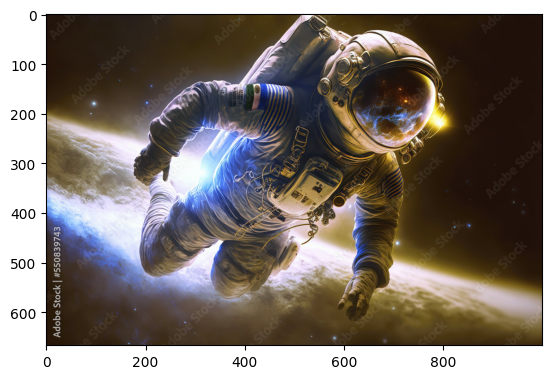

In [43]:
path_img = './Testing_images/AI_Generated_Images/astro.jpg'
find_out(path_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The given image is AI Generated.


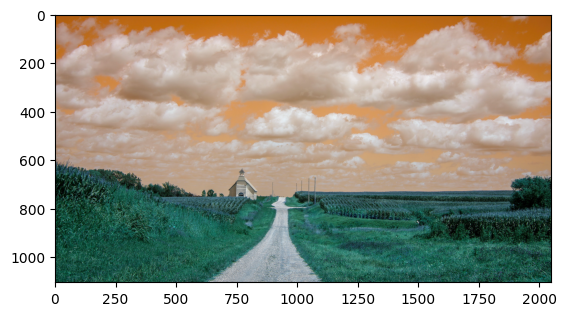

In [44]:
path_img = './Testing_images/Real_Images/bgreal.jpg'
find_out(path_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The given image is AI Generated.


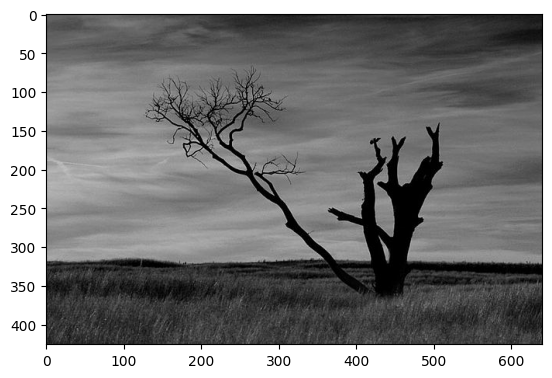

In [48]:
path_img = './Testing_images/Real_Images/deadtree.jpg'
find_out(path_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The given image is AI Generated.


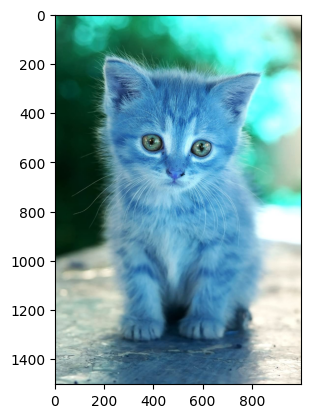

In [49]:
path_img = './Testing_images/Real_Images/realcat.jpeg'
find_out(path_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The given image is AI Generated.


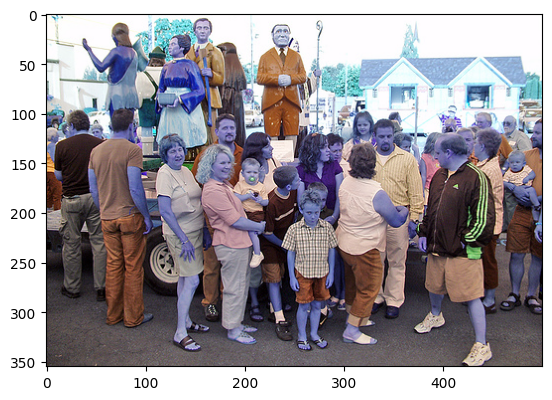

In [50]:
path_img = './Testing_images/Real_Images/family.jpg'
find_out(path_img)